In [4]:
'''1. Implement Linear Regression and calculate sum of residual error on the following
Datasets.
x = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
y = [1, 3, 2, 5, 7, 8, 8, 9, 10, 12]
 Compute the regression coefficients using analytic formulation and calculate Sum
Squared Error (SSE) and R 2 value.
 Implement gradient descent (both Full-batch and Stochastic with stopping
criteria) on Least Mean Square loss formulation to compute the coefficients of
regression matrix and compare the results using performance measures such as R 2
SSE etc.'''

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


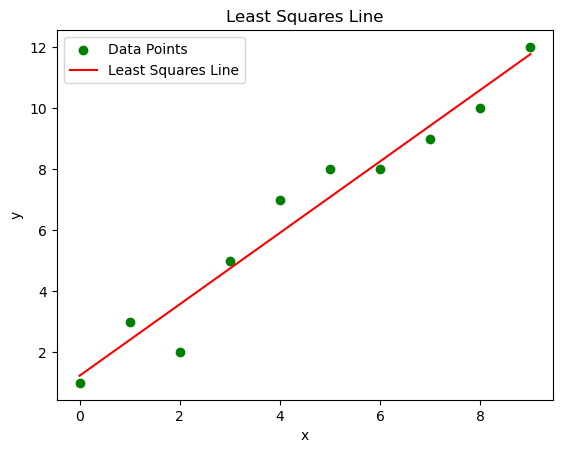

beta_0: 1.2363636363636363
beta_1: 1.1696969696969697


In [5]:
x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
y = np.array([1, 3, 2, 5, 7, 8, 8, 9, 10, 12])
X=x
x_mean = np.mean(x)
y_mean = np.mean(y)

beta_1 = np.sum((x - x_mean) * (y - y_mean)) / np.sum((x - x_mean) ** 2)

beta_0 = y_mean - beta_1 * x_mean

# Least squares line equation: y = beta_0 + beta_1 * x

# Plot the data points
plt.scatter(x, y, color='green', label='Data Points')

# Plot the least squares line
plt.plot(x, beta_0 + beta_1 * x, color='red', label='Least Squares Line')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Least Squares Line')
plt.legend()
plt.show()
print("beta_0:", beta_0)
print("beta_1:", beta_1)


In [6]:
# Predictions
y_pred = beta_0 + beta_1 * x
# Calculate SSE
SSE = np.sum((y - y_pred) ** 2)
# Calculate total sum of squares (SST)
SST = np.sum((y - y_mean) ** 2)
# Calculate R-squared
R_squared = 1 - (SSE / SST)

print("SSE:",SSE)
print("R-squared:",R_squared)


SSE: 5.624242424242423
R-squared: 0.952538038613988


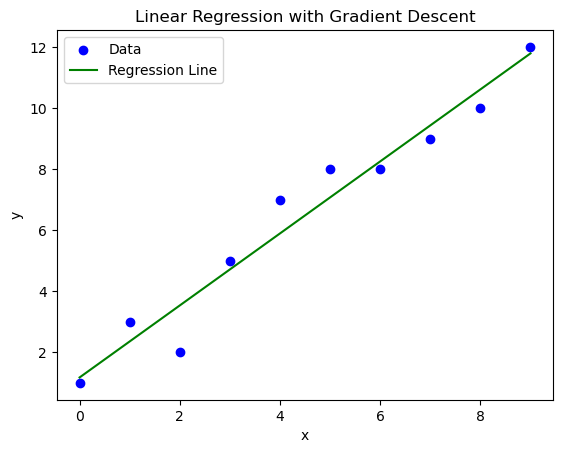

Final parameters (intercept, slope): [1.17878788 1.17878788]
Final cost: 0.2816919191919192


In [7]:
theta = np.zeros(2)  # [intercept, slope]
def cost_function(x, y, theta):
    m = len(y)
    y_pred = theta[0] + theta[1] * x
    cost = (1 / (2 * m)) * np.sum((y_pred - y) ** 2)
    return cost
def gradient_descent(x, y, theta, learning_rate, iterations):
    m = len(y)
    costs = []
    for _ in range(iterations):
        y_pred = theta[0] + theta[1] * x
        error = y_pred - y
        gradient = (1 / m) * np.dot(error, x)
        theta -= learning_rate * gradient
        costs.append(cost_function(x, y, theta))
    return theta, costs
learning_rate = 0.01
iterations = 1000
theta_final, costs = gradient_descent(x, y, theta, learning_rate, iterations)
plt.scatter(x, y, color='blue', label='Data')
plt.plot(x, theta_final[0] + theta_final[1] * x, color='green', label='Regression Line')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression with Gradient Descent')
plt.legend()
plt.show()
print("Final parameters (intercept, slope):", theta_final)
print("Final cost:", costs[-1])

In [15]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [16]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [17]:
housing = pd.DataFrame(housing.data, columns=housing.feature_names)
housing.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [18]:
X = housing.iloc[:,:-1]
y = housing.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [19]:
regression_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])
regression_pipeline.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor', LinearRegression())])

In [20]:
y_pred = regression_pipeline.predict(X_test)
r2_score( y_test, y_pred)

0.892626162310851

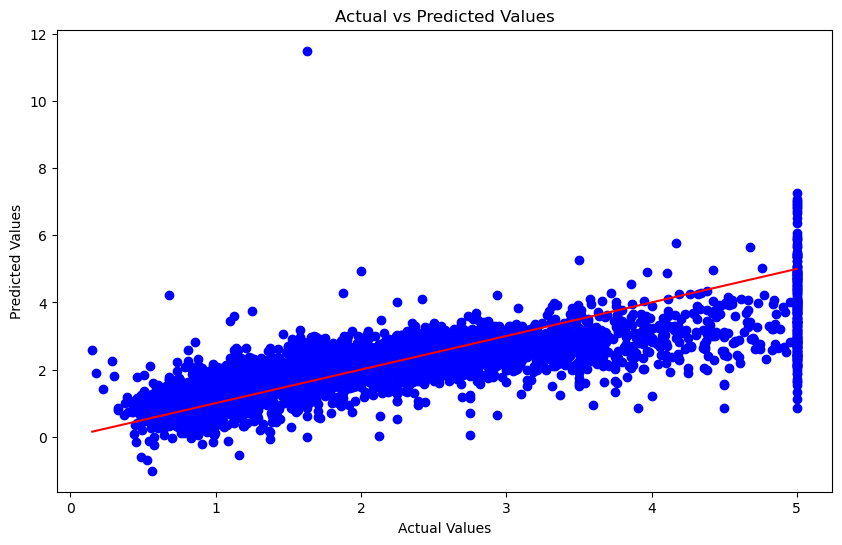

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Load the California housing dataset
california_housing = fetch_california_housing()

X = california_housing.data
y = california_housing.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
import matplotlib.pyplot as plt
y_pred = model.predict(X_test)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Diagonal line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()


In [ ]:
from sklearn.preprocessing import StandardScaler

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Full-Batch Gradient Descent with feature scaling
def full_batch_gradient_descent_scaled(X, y, learning_rate=0.01, n_iterations=1000):
    n_samples, n_features = X.shape
    theta = np.random.randn(n_features)  # Initialize weights randomly
    for _ in range(n_iterations):
        gradients = -2/n_samples * X.T.dot(y - X.dot(theta))
        theta -= learning_rate * gradients
    return theta

# Stochastic Gradient Descent (SGD) with feature scaling
def stochastic_gradient_descent_scaled(X, y, learning_rate=0.01, n_iterations=1000):
    n_samples, n_features = X.shape
    theta = np.random.randn(n_features)  # Initialize weights randomly
    for _ in range(n_iterations):
        random_index = np.random.randint(n_samples)
        xi = X[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = -2 * xi.T.dot(yi - xi.dot(theta))
        theta -= learning_rate * gradients
    return theta

# Compute coefficients using full-batch gradient descent with feature scaling
theta_full_batch_scaled = full_batch_gradient_descent_scaled(X_train_scaled, y_train)

# Compute coefficients using stochastic gradient descent with feature scaling
theta_stochastic_scaled = stochastic_gradient_descent_scaled(X_train_scaled, y_train)

# Evaluate performance on test set
y_pred_full_batch_scaled = X_test_scaled.dot(theta_full_batch_scaled)
y_pred_stochastic_scaled = X_test_scaled.dot(theta_stochastic_scaled)

mse_full_batch_scaled = mean_squared_error(y_test, y_pred_full_batch_scaled)
mse_stochastic_scaled = mean_squared_error(y_test, y_pred_stochastic_scaled)

print("Mean Squared Error (Full-Batch Gradient Descent with Scaling):", mse_full_batch_scaled)
print("Mean Squared Error (Stochastic Gradient Descent with Scaling):", mse_stochastic_scaled)

'''OUTPUT:
Mean Squared Error (Full-Batch Gradient Descent with Scaling): 4.913849676339338
Mean Squared Error (Stochastic Gradient Descent with Scaling): 5.039873947074802'''